In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler


In [16]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000, reg_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.reg_lambda = reg_lambda
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y, y_hat, weights, m):
        loss = -(1/m) * np.sum(y*np.log(y_hat+1e-9) + (1-y)*np.log(1-y_hat+1e-9))
        reg = (self.reg_lambda/(2*m)) * np.sum(weights**2)
        return loss + reg

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for epoch in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_hat = self.sigmoid(linear_model)

            dw = (1/m) * np.dot(X.T, (y_hat - y)) + (self.reg_lambda/m) * self.weights
            db = (1/m) * np.sum(y_hat - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            loss = self.compute_loss(y, y_hat, self.weights, m)
            self.loss_history.append(loss)

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_hat = self.sigmoid(linear_model)
        return np.where(y_hat >= 0.5, 1, 0)

In [17]:
def train_and_evaluate(vectorizer, X_train, X_test, y_train, y_test, lr=0.01, epochs=1000, reg_lambda=0.0, scale=False):

    X_train_vec = vectorizer.fit_transform(X_train).toarray()
    X_test_vec = vectorizer.transform(X_test).toarray()

    if scale:
        scaler = StandardScaler()
        X_train_vec = scaler.fit_transform(X_train_vec)
        X_test_vec = scaler.transform(X_test_vec)

    model = LogisticRegressionScratch(lr=lr, epochs=epochs, reg_lambda=reg_lambda)
    model.fit(X_train_vec, y_train.values)
    y_pred = model.predict(X_test_vec)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\nUsing {vectorizer.__class__.__name__}, scale={scale}, lambda={reg_lambda}:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

    return model.loss_history


In [20]:
data = pd.read_csv("spam.csv", encoding='latin-1')

data = data.iloc[:, :2]
data.columns = ['label', 'message']

data['label'] = data['label'].map({'ham': 0, 'spam': 1})

X_train, X_test, y_train, y_test = train_test_split(
    data['message'], data['label'], test_size=0.2, random_state=42
)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_


Using CountVectorizer, scale=False, lambda=0.0:
Accuracy: 0.8664
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
Confusion Matrix:
[[966   0]
 [149   0]]
Classification Report:
               precision    recall  f1-score   support

         Ham       0.87      1.00      0.93       966
        Spam       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115


Using CountVectorizer, scale=True, lambda=0.0:
Accuracy: 0.9874
Precision: 0.9592
Recall: 0.9463
F1-score: 0.9527
Confusion Matrix:
[[960   6]
 [  8 141]]
Classification Report:
               precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       966
        Spam       0.96      0.95      0.95       149

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_


Using CountVectorizer, scale=False, lambda=0.0:
Accuracy: 0.8664
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
Confusion Matrix:
[[966   0]
 [149   0]]
Classification Report:
               precision    recall  f1-score   support

         Ham       0.87      1.00      0.93       966
        Spam       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_


Using TfidfVectorizer, scale=False, lambda=0.0:
Accuracy: 0.8664
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
Confusion Matrix:
[[966   0]
 [149   0]]
Classification Report:
               precision    recall  f1-score   support

         Ham       0.87      1.00      0.93       966
        Spam       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_


Using CountVectorizer, scale=False, lambda=0.01:
Accuracy: 0.8664
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
Confusion Matrix:
[[966   0]
 [149   0]]
Classification Report:
               precision    recall  f1-score   support

         Ham       0.87      1.00      0.93       966
        Spam       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_


Using CountVectorizer, scale=False, lambda=0.1:
Accuracy: 0.8664
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
Confusion Matrix:
[[966   0]
 [149   0]]
Classification Report:
               precision    recall  f1-score   support

         Ham       0.87      1.00      0.93       966
        Spam       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_


Using CountVectorizer, scale=False, lambda=1.0:
Accuracy: 0.8664
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
Confusion Matrix:
[[966   0]
 [149   0]]
Classification Report:
               precision    recall  f1-score   support

         Ham       0.87      1.00      0.93       966
        Spam       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



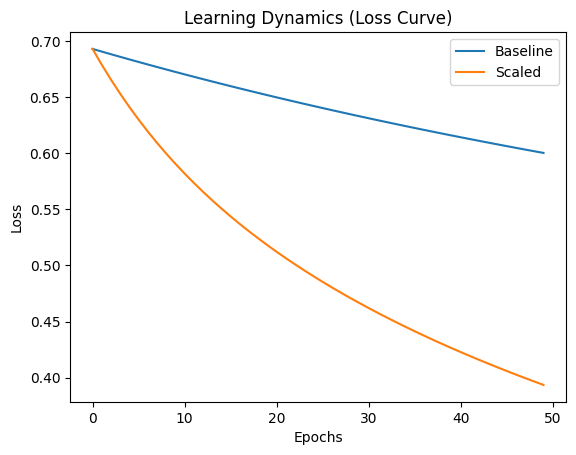

In [24]:
count_vec = CountVectorizer()
tfidf_vec = TfidfVectorizer()

loss_baseline = train_and_evaluate(count_vec, X_train, X_test, y_train, y_test, lr=0.01, epochs=50)

loss_scaled = train_and_evaluate(count_vec, X_train, X_test, y_train, y_test, lr=0.01, epochs=50, scale=True)

loss_count = train_and_evaluate(count_vec, X_train, X_test, y_train, y_test, lr=0.01, epochs=50)
loss_tfidf = train_and_evaluate(tfidf_vec, X_train, X_test, y_train, y_test, lr=0.01, epochs=50)

for reg in [0.01, 0.1, 1.0]:
    _ = train_and_evaluate(count_vec, X_train, X_test, y_train, y_test, lr=0.01, epochs=50, reg_lambda=reg)

plt.plot(loss_baseline, label="Baseline")
plt.plot(loss_scaled, label="Scaled")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Dynamics (Loss Curve)")
plt.legend()
plt.show()